### Ensemble Learning: Boosting: 

__Some Simple Rules that are indicative of spam email, instead of some complicated rule:__  
- body: "manly" __+__ (SPAM) 
- from: spouse __-__(HAM)
- very short __+__
- just URLs __+__
- porn, "Make.Money.Fast", blacklist of words __+__
- just image __+__

- Now, __note:__ all of these are sort of right. There're useful but no one of them is going to be cery good at telling us whether a message has spam on its own.
- For example: The word _manly_ is evidence but it's not enoiugh to decide whther something is spam or not. 
- __So,__ we see that all of these would provide some evidence, but it seems really hard to figure out the right way of combining them all together to make a decision.
- If you think about decision trees, there's really a sort of similar problem going on there. We can think of each of the nodes in a decision tree as being a very simple rule and the decision tree tells us how to combine them. 
- Here, we need to figure out a way of combining these rules and that is the fundamental notion of _ensemble learning._  
- __Question:__ Couldn't you also do something similar with neural networks, where each of these rules becomes a feature and we're just trying to learn way to combine them all together. 
- The difference between the notion of learning simple rules (like in decision trees) and neural  networks is that in neural networks, you have decided what the rules are beforehand. And then you just assign weights to the rules. In decision trees, you learn rules as you go along. 

### Ensemble Learning Simple Rules: 
- The characteristic of ensemble learning is that 
    - You take a  bunch of simple rules, all of which make sense and kinda help, but on their own, individually, don't give a good answer. 
    - You magically combine them in some way to create a complex rule that works great. 
- Basic Form of Ensemble Learners: 
    - Learn over a subset of the data, and that will generate some kind of rules. 
    - And then you learn over another subset of the data, and that generates a different rules (not necessarily different, DOUBT).
    - So on and so forth... you keep generating rules, and then combine them in 1 single rule. 
- __Note__: The simple rules that you learn from one subset may not apply to another subset. 
- __Question__: Why are we looking at small subsets of data,  I do not understand why we cannot look at the all of the data? 
    - Basic Answer: If we look at all of the data, we will get complex rules directltly, not simple rules. 
    - The more desriptive answer: 

### Ensemble Learning Algorithm: 
- Pick uniform random subset
- Apply a learnign algorithm to it to learn simple rules. 
- Do the same for many uniform random subsets, generating many rules. 
- Combine them by equally believing in them as each of them learned over a random subset of the data. 
    - by voting (for classification) ?
    - by averaging (for regression) ? 
- __Question : Why wouldn't ewe equally believe each of the predictors? Each one of them learned over a random subset of the data. Uou have no reason to believe that one's better than the other? __ 

### Quiz: Ensemble Learning Outputs 
- You've got N data points. 
- The learner that you're going to use over your subsets is 1 $0^th$ order polynomial. 
- The way you're going to combine the output of the learners is by averaging them. 
- You uniformly randomly picked them and you ended up with N disjoint subsets, and each one has a single data point in it that happens to be one of the data points.
    - Therefore, each learner will just learn the $(x,y)$ data point given to it. 
    - __Therefore, the _ensemble output_ for any $x$ will be the mean of each of the data points as it will ask each of the learners to output their prediction. __ 

### Ensemble Learning An Example: `Bagging / Bootstrap Aggregation`: 
- The $3^{rd}$ order polynomial that shows the average of all the predictors in the ensemble of which each learns from a subset of the data, __does worse than__ the $4^{th}$ order polynomial that learns from the entire data on the __training set__. 
- The $3^{rd}$ order polynomial that shows the average of all the predictors in the ensemble of which each learns from a subset of the data, __generalizes better than__ the $4^{th}$ order polynomial that learns from the entire data. 
- __DOUBT: Why does the ensemble of predictors perform better than a single predictor on the entire data? __
    - Intuitively, it helps in avoiding overfitting. By using simpler degree polynomial on random subsets of the data, you collect the information that is most important and then kinda average it out, to avoid committing to the data too much. 
    - But then you are using a less complex model on a subset of the data, so that may lead to the same overfitting effect. 

### Ensemble `Boosting`:   
- So __`bagging`__ had 2 parts, right? 
    - Learn simple rules over a subset of the data ( which you hace chosen uniformly randomly).   
    - When asked for a particular prediction for an example, combine the rules by:
         - mean/average (for regression) 
         - voting (for classification)
- Idea for __`boosting`__:
    - Rather than choosing uniformly randomly over the data, we should try to take advantage of what we are learning as we go along, and instead of focussing just kind of randomly, we should pick the examples that we are not good at. In other words, we should pick a subset based on whether or not the examples in that subset are hard. 
        - For example, if you find a rule that helps in classifying a subset of the data well, but does not work well for other parts of the data. You should focus on the subsets of the data that you have not being able to classify rather than focussing on subsets which you already know how to classify. 
    - And for combining the outputs of different predictors, you would take a _weighted mean_, instead of the _mean_. 
- __Question: By focussing on the hardest question, and then mastering them, what's to keep the learner from starting to lose track of the ones it has already mastered? How does it not thrash back and forth? __

### Ensemble Boosting Quiz: 
- Notation:
    - Error: 
        - Accuracy: The total number of correct answers over the total number of answers. (for classification) 
        - Mean Squared Error (for regression) 
    - Note that: implictly, the above performance metrics assume that each example is equally important. That is not always the case. 
    - _Another definition of __Error___: The probability (given the distribution of samples) that the predicted output is equal to the real output. 
        - # $P_{\mathbf{D}}(h(x) \neq c(x) $ where:
            - $\mathbf{D}$ is the underlying distribution from where samples are drawn. 
            - $h$ is our hypothesis, which is the estimate of what the true concept is. 
            - $h(x)$ is the predicted output. 
            - $c$ is our true concept.
            - $c(x)$ is the true output. 
- __Question: How is this different from mismatches / accuracy / mean squared error? __ 
    - _(in the sense that if we caclulate the accuracy on the test set, if the test set is large enough, we will get a value close to $P_\mathbf{D}(h(x) \neq c(x))$._ 

- If there is the case that some examples are more important than other examples, you may want to use this probability definition. 
- For example: 
    - If there are 4 data points, and we classified 2 correctly. That means:
        - Accuracy: 2/4 = 1/2 
        - $P_D(h(x) \neq c(x))$ = 1/2
     - __NOTE:__ This assumes that each of the data points is equally likely to occur. 
    - But what if i tell you that each of the points is likely to be seen in different proportions? 
        - Accuracy will still be the number of correctly classified points upon the number of points = 1/2. 
        - $P_D(h(x) \neq c(x))$ = 2/20 = 1/10. 
        - What is this saying?
        - This is saying that we can expect an error 1/10th of the time, when going through the datset.
- What the above is trying to say is that, you may get a lot of errors, or you might get few errors. But the thing to note is that some examples are more important than the other examples because some examples are rare. 
- So here, we are thinking of error, not as the number of distinct mistakes that you'll make, but rather the ammount of time you'll be wrong, or the amount of time you'll make a mistake. 
- This makes the underlying distribution of examples important.

- `Boosting` is going to use this notion of distribution of examples to define what `hardest` is. 
    - Since we are going to have learning algorithms that do a pretty good jon of learning on a bunch of examples, we're going to pass along them a distribution of the examples. 
    - which is just another way of telling the learning algorithms, which examples are important to learn versus which examples are not as important to learn. 
    - This is where the `hardest` notion will come in. 
    - Every time we see a bunch of examples, we're going to make the `harder` ones more important to get right than the ones that we already know how to solve. 

- __Weak Learner__: A learner that does only slighly better than random guessing. 
- No matter what the distribution over the data is, you're always going to have an error rate that's less than $\frac{1}{2}$. That is the same thing as being wrong just a little less than half the time. Which, in turn is the same as doing slighltly better than random guessing. 
- Formally: 
    - # $ \forall_{\mathbf{D}}P_{\mathbf{D}}[.] \leq \frac{1}{2} - \epsilon  $

### Boosting in psedocode: 
- Given training set {$x_i, y_i$}.
    - $y_i$ in {$-1, +1$} `# binary classification`
- For(loop) $t = 1$ to $T$: `# t: timestep, T: final timestep`
    - Construct $\mathbf{D}_t$ distribution  of your examples at some given time $t$ 
    - Given the distribution, Find weak classifier $h_t(x)$ which should have a small error ($\leq 1/2)$:
        - ### $\epsilon_t = P_{\mathbf{D}}[h_t(x_i) \neq y_i]$
        - such that it does well on training set (given distribution) 
        - In other words, the probability of the learner being wrong is small given the underlying distribution. 
- Output $H_{final}$

### The most important parts: 
- Base Case: 
    - The distribution at the beginning: $\mathbf{D}_1(i) = \frac{1}{m}$ . 
        - This distribution is going to be over training set with each training example having an importance of $\frac{1}{m}$. 
        - In other words, the first distribution is going to be a uniform distribution of the traininig examples. 
- At each time step: 
    - We are going to construct a new distribution: 


## Setup: 

In [1]:
from __future__ import print_function, division, unicode_literals

# Common imports: 
import numpy as np
import pandas as pd
import os

# To plot pretty figures:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

## Intro: 
- Suppose you ask a complex question to thousands of random people, then aggreagate their answers. 
- In many cases you will find that this aggregated answer is better than an expert's answer. 
- This is called the _wisdom of the crowd_. 
- Similarly, if you aggreate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with best individual predictor. 
- A group of predictors is called an _ensemble_. 
- Thus, this technique is called _Ensemble Learning_, and an Ensemble Learning algorithm is called a method. 
- For example:
    - You can train a group of Decision Tree Classifiers, each on a different random subset of the training set. 
    - To make predictions, you just obtain the predictions of all the individual trees, then predict the class that gets the most votes. 
    - Such an ensemble of Decision Trees is called a _Random Forest_, and despite it's simplicity, this is one of the most powerful Machine Learning algorithms available today. 
    - Moreover, you will often use Ensemble Methods near the end of a project, one you have already build a few good predictors, to combine them into an even better predictor. 
    - In fact, the winning solutions in Machine Learning competitions often involve several Ensemble Methods.
    

## Voting Classifiers: 
- Suppose you have trained a few classifiers, each one achieving 80% accuracy. 
- You may have a Logistic Regression classifiers, an SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier, and perhaps a few more. 
- A very simple way to create an even better classifier is to aggreate the predictions of each classifier and predict the class that gets the most votes. 
- This majority-vote classifier is called a _hard voting_ classifier. 
- Somewhat suprisingly, this voring classifier often achieves a higher accuracy than the best classifier in the ensemble. 
- In fact, even if each classifier is a _weak learner_(meaning it does only slightly better than random guessing), the ensemble can still be a _stong learner_ (achieving high accuracy), provided there are sufficien number of weak learners and they are sufficiently diverse. 
- _ DOUBT: Try it on the MNIST, an ensemble of weak learners, vs and ensemble of strong learners. How much of a difference does it make?_ 
- But how is this possible? How can a bunch of weak learners help in making a strong learner? These are not like some thin people trying to push a big stone. They are  artificial constructs that are weak. So an ensemble of them should also be weak, if not equally weak. 

- The following analogy can help shed some light on the mystery.
    - Suppose you have a slighly biased coin that has a 51% chance of coming up heads, and a 49% chance of coming up tails. 
    - If you toss it 1,000 times, you will generally get more or less 510 heads and 490 tails, and hence a majority of heads. 
    - If you do the math, then you will find that the probability of obtaining a majority of heads after 1,000 tosses is close to 75%. 
    - The more you toss the coin, the higher the probability (eg: with 10,000 tosses, the probability climbs over 9%). 
    - This is due to the _law of large numbers_. 
    - As you keep tossing the coin, the ratio of heads gets closer and close to the probability of heads, i.e 51%. 
    - You can see that as the number fo tosses increases, the raio of the heads approaches 51%. 
    - Eventually, all the 10 series end up so close to 51% that they are consistently above 50%. 
    

In [2]:
heads_proba = 0.51

In [3]:
np.random.seed(42)
pd.DataFrame(np.random.rand(10000, 10)).sample(frac = 5/10000, random_state = 42)

,0,1,2,3,4,5,6,7,8,9
6252,0.225187,0.841510,0.480051,0.469989,0.985694,0.519215,0.137045,0.280156,0.333682,0.958467
4684,0.476569,0.208680,0.540788,0.925869,0.027088,0.680307,0.624709,0.924427,0.645345,0.624843
1731,0.584039,0.595450,0.777153,0.505926,0.509402,0.725311,0.498624,0.608491,0.897774,0.401451
4742,0.394445,0.571314,0.991215,0.535574,0.988575,0.747199,0.120722,0.795966,0.161286,0.532329
4521,0.094016,0.523708,0.506745,0.606548,0.330793,0.925918,0.270061,0.649696,0.495927,0.266673


In [4]:
np.random.seed(42)
pd.DataFrame((np.random.rand(10000, 10) < heads_proba).astype(np.int32)).sample(frac = 5/10000, random_state = 42)

,0,1,2,3,4,5,6,7,8,9
6252,1,0,1,1,0,0,1,1,1,0
4684,1,1,0,0,1,0,0,0,0,0
1731,0,0,0,1,1,0,1,0,0,1
4742,1,0,0,0,0,0,1,0,1,0
4521,1,0,1,0,1,0,1,0,1,1


In [5]:
np.random.seed(42)
# Flipping 10 coins at a time, 1 for heads, 0 for tails
# Flipping the 10 coins for a total of 10,000 times 
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)

In [6]:
#np.cumsum: Returns the cumulative sum of the elements
# along a given axis: 
a = np.array([[1,2,3],
              [4,5,6]])
# Sum over each columns, for each of the rows
print(np.cumsum(a, axis = 1))
# [[ 1  3  6]
#  [ 4  9 15]]
# Sum over each row, for each of the columns 
print(np.cumsum(a, axis = 0))
# [[1 2 3]
#  [5 7 9]]

[[ 1  3  6]
 [ 4  9 15]]
[[1 2 3]
 [5 7 9]]


In [7]:
# Sums up each row 
cumulative_heads = np.cumsum(coin_tosses, axis = 0)
pd.DataFrame(cumulative_heads).head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,1,1,1,0,0,0
1,2,0,0,1,2,2,2,0,1,1
2,2,1,1,2,3,2,3,0,1,2
3,2,2,2,2,3,2,4,1,1,3
4,3,3,3,2,4,2,5,1,1,4


In [8]:
np.arange(1, 100001).reshape(-1,1)

array([[     1],
       [     2],
       [     3],
       ..., 
       [ 99998],
       [ 99999],
       [100000]])

In [9]:
# Returns the heads ratio for each coin flipped, as the 
# number of flips increase. 
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)
pd.DataFrame(cumulative_heads_ratio).head()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.0,0.00,0.000000,0.000000
1,1.000000,0.000000,0.000000,0.500000,1.00,1.000000,1.0,0.00,0.500000,0.500000
2,0.666667,0.333333,0.333333,0.666667,1.00,0.666667,1.0,0.00,0.333333,0.666667
3,0.500000,0.500000,0.500000,0.500000,0.75,0.500000,1.0,0.25,0.250000,0.750000
4,0.600000,0.600000,0.600000,0.400000,0.80,0.400000,1.0,0.20,0.200000,0.800000


In [10]:
pd.DataFrame(cumulative_heads_ratio).tail()

,0,1,2,3,4,5,6,7,8,9
9995,0.511405,0.511505,0.506803,0.509304,0.511405,0.504202,0.513806,0.509404,0.510604,0.510204
9996,0.511353,0.511453,0.506852,0.509353,0.511353,0.504251,0.513854,0.509453,0.510653,0.510153
9997,0.511402,0.511502,0.506801,0.509302,0.511402,0.504201,0.513803,0.509502,0.510702,0.510102
9998,0.511351,0.511451,0.506851,0.509351,0.511351,0.504250,0.513751,0.509551,0.510751,0.510151
9999,0.511300,0.511500,0.506800,0.509400,0.511300,0.504200,0.513700,0.509500,0.510800,0.510200


[0, 10000, 0.42, 0.6]

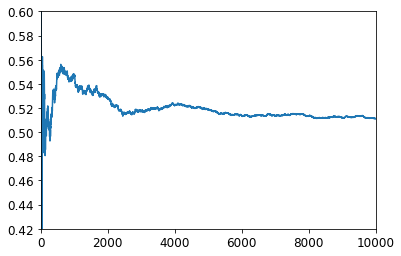

In [11]:
plt.plot(cumulative_heads_ratio[:,0])
plt.axis([0,10000, 0.42,0.60])

__Note: This happens because you are putting a threshold of 0.51. This means you are capturing 51% of the values between 0 and 1 : to be heads. __
- if you replace the above number by 0.70, you will be supposing that any value between 0 and 1 (below 0.70) is heads (or 1, in int32 terms). Therefore, it will contribute to the cumulative sum. As the number of flips increse, you will be getting a 1 if its less than your threshold, and 0 if its more than your threshold. 
- In essence, you will be capturing 0.51 of your data. And therefore, the cumulative_ratio will merge with your set threshold, after multiple flips (rows).

Saving figure law_of_large_numbers_plot


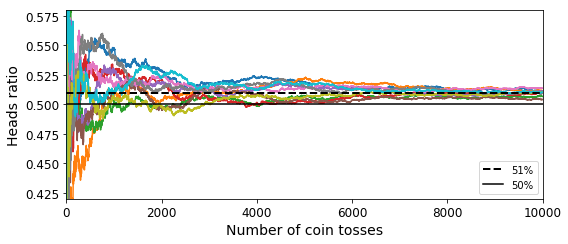

In [12]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("law_of_large_numbers_plot")
plt.show()

- Similarly, suppose you build an ensemble containing 1,000 classifiers that are idividually correct only 51% of the time (barely better than random guessing). 
- If you predict the majority voted class, you can hope for up to 75% accuracy! 
- However, this is only true if all the classifiers are perfectly independent, making uncorrelated errors, which is clearly not the case since they are trained on the same data.
- They are likely to makle the same types of erros, so there will be many mojority votes for the wrong class, reducing the ensemble's accuracy. 

__TIP__: 
- Ensemble methods work best when the predictors are as independent from one another as possible. 
- One way to get diverse classifiers is train them using very different algorithms. 
- This increases the chance that they will make very different types of errors, improving the ensemble's accuracy. 

Now, 
- The following code train a voting classifier in `Scikit-Learn`, composed of three diverse classifiers. 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 500, noise = 0.30,
                 random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

In [14]:
pd.DataFrame(np.c_[X_train, y_train]).head()

,0,1,2
0,1.538699,0.188744,1.0
1,0.394699,0.323724,0.0
2,-0.919147,1.311882,0.0
3,1.053964,-0.700408,1.0
4,1.040678,-0.437339,1.0


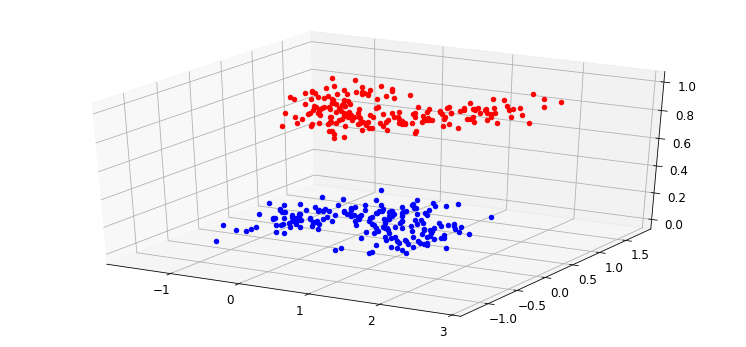

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (13,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0][y_train == 1], X_train[:,1][y_train == 1], 1 , c = "r", depthshade = False)
ax.scatter(X_train[:,0][y_train == 0], X_train[:,1][y_train == 0], 0 , c = "b", depthshade = False)


## [__`sklearn.ensemble.RandomForestClassifier`__](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## [__`sklearn.ensemble.VotingClassifier`__](https://www.google.co.in/search?q=votingclassifier&oq=votingclassifi&aqs=chrome.0.0j69i57j0l4.2798j0j4&sourceid=chrome&ie=UTF-8)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state = 42)
# >> Uses the logistic function hypothesis along with
# the logloss function to train the classifier with 
# gradient descent.

rnd_clf = RandomForestClassifier(random_state = 42)
# >> Creates a bunch of decision trees on radnom subsets of
# the training data and returns the most votted class. 

svm_clf = SVC(random_state = 42)
# Large margin classifiers, sepearates the data with a 
# hyperplane. 

DOUBT: How does setting different random states to different classifers effect ensemble learning. 

In [17]:
# Combining them for hard voting: 
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [("lr", log_clf), 
                 ("rf", rnd_clf),
                 ("svc", svm_clf)],
voting = "hard")

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

- Let's look at each classifiers' accuracy on the test set: 

In [18]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, 
                                                y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


- There you have it! The voting classifier slightly outperforms all the individual classifiers. 
- If all classifiers are able to estimate the class probabilities (i.e they have a `predict_proba()` method, then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. 
- This is classed _soft voting_. It often achieves higher performance than hard voting because it fives more weight to highly confident votes. 
- All you need to do is to replace `voting = "hard"` with `"soft"` and ensure that all classifiers can estimate the class probabilities. 
- This is not the case of the `SVC` class by default, so you need to set its `probability` hyperparameter to `True`.
    - This will make the `SVC` class use cross -validation to estimate the class probabilities, slowing down training, and it will add a `predict_proba()` method. 


In [19]:
# Modifying preceeding code to use soft voting: 

log_clf = LogisticRegression(random_state = 42)
rfc_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(probability = True, random_state = 42)
voting_clf = VotingClassifier(
    estimators = [('logistic', log_clf),
                 ('random_forest', rfc_clf),
                 ('svm', svm_clf)],
    voting = "soft")

In [20]:
for clf in (log_clf, rfc_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, 
                                                y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


## Bagging and Pasting: 

- One way to get a diverse set of classifiers is to use very different training algorithms, as discussed. 
- Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. 
- When samples is performed _with_ replacement, this method is called __bagging__(short for __bootstrap aggregating__, which means _sampling with replacement_ in  statistics. 
- When sampling is performed _without_ replacement, it is called __pasting__. 
- In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor. 
- Once all the predictos are trained, the ensemble can make a prediction for a new instance by simp[ly aggreagating the predictions of all the predictors. 
- The aggreagation function is typically:
    - the _statistical mode_ ( i.e the most frequent prediction, just like hard voting classifier) for classification
    - or the _average_ for regression. 
    - __Note:__ The `BaggingClassiofier` automatically performs `soft` voting instead of `hard` voting if the base classifier can estimate class probabilities (i.e, if it has a `predict_proba()` method. 
- Each individual predictor has higher bias than if it were trained on the original training set as it gets less data, so it underfits. But aggreagation reduces both bias and variance. 

- Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set. 
- __Note:__ The predictors can all be trained in parallel, via different CPU cores or even different servers. 
- Similarly, predictions can be made in parallel. 
- This is one of the reasons why bagging and pasting are such popular methods. They work well with a lot of data, as all the algorithms can train and predict in parallel.  

__Bagging and Pasting in Scikit-Learn__: 
- ## [__`sklearn.ensemble.BaggingClassifier`__](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
- ## [__`sklearn.ensemble.BaggingRegressor`__](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

- The following code trains an ensemble of 500 Decision Tree classifiers, each trained on 100 training instance randomly sample from the training set _with_ replacement.
- The `max_samples` can be set to a float between 0 and 1, in which case the max number of instance to sample is equal to the size of the training instances times the `max_samples`. 
- This is an example of __bagging__, but if you want to use pasting, use `bootstrap = False`. 
- The `n_jobs` parameter tells Scikit-Learn the number of CPU cores to use for training and predictions ($-1$ tells Scikit - Learn to use all available cores): 


In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),
    n_estimators = 500, 
    max_samples = 100, 
    bootstrap = True, 
    n_jobs = -1, 
    random_state = 42)

bag_clf.fit(X_train, y_train)
# Trains 500 decision tree classifiers on randomly 
# selected 100 training instances _with_ replacement. 

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [22]:
y_pred = bag_clf.predict(X_test)
# >> will return the mode of all the predictions across
# all the decision trees for each instance in the test 
# set. 

In [23]:
accuracy_score(y_test, y_pred)

0.90400000000000003

In [24]:
# Using Pasting: 
paste_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),
    n_estimators = 500, 
    max_samples = 100, 
    bootstrap = False, 
    n_jobs = -1, 
    random_state = 42)

paste_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [25]:
y_pred = paste_clf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.91200000000000003

- Bootstapping introduced a bit more diversity in the subsets that each predictor is trained on, so bagging end up with a slighly higher bias than pasting. In other words, a bagged model underfit more than a pasting model cause the bagged model has randomized data. 
- This also means that the predictors end up being less correlated so the ensemble's variance is reduced. 
- Overall, bagging often reuslts in better models, which explains why it is generally preferred. 
- DOUBT: Shouldn't pasting perform better? It goes through the entire dataset? I did not properly understand the notion behind many bias predictors being less correlated with each other leading to the enemble having less variance. 

In [27]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.85599999999999998

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    # Creates 100 evenly distributed values between min and max
    # values of x1
    
    x2s = np.linspace(axes[2], axes[3], 100)
    # Creates 100 evenly distributed values between min and max
    # values of x2
    
    x1, x2 = np.meshgrid(x1s, x2s)
    # >> (100,100) arrays, with x1s repeated in each row
    # and x2s repeated in each column
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # Matches each possible x1 with each possible x2
    # >> (10000, 2)
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    # Predicting on all possible combination of points
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    # Pltting the datapoints     
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving figure decision_tree_without_and_with_bagging_pasting_plot


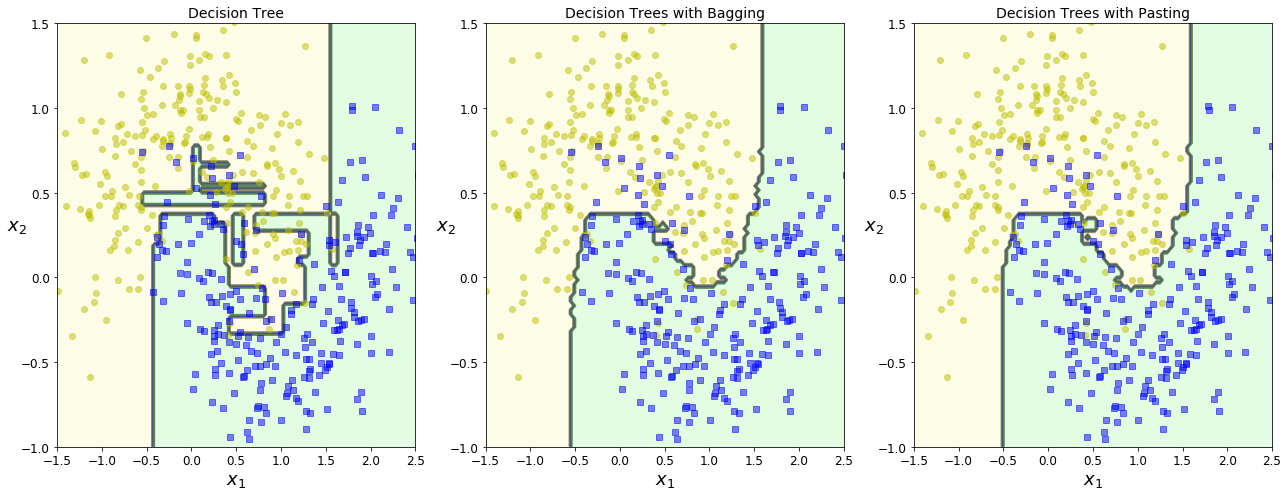

In [29]:
plt.figure(figsize=(18,7))
plt.subplot(131)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(132)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.subplot(133)
plot_decision_boundary(paste_clf, X, y)
plt.title("Decision Trees with Pasting", fontsize=14)
save_fig("decision_tree_without_and_with_bagging_pasting_plot")
plt.show()

### Out of the Bag Evaluation: 
- With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. 
- By default the `BaggingClassifier` samples `m` training instances with replacement (`bootstrap = True`) where `m` is the size of the training set. 
- This means that only about 63% od the training instances are sampled on average for each predictor. 
- DOUBT: Did not understand the reason behinf the 63%. 
- The remaining 37% of the training instances that are not samples are called __out-of-bag__ instances. 
- __Note that__ they are not the same 37% for all predictors. 
- Since a predictor never sees the _oob_ instances during training, it can be evaluated on these instance without the need for a seperate validation set or cross-validation. 
- You can evaluate the ensemble itself by averaging out the oob evaluation of each predictior. 
- In Scikit-Learn, you can set `oob_score = True` when creating a `BaggingClassifier` to request an automatic oob evaluation after training. 
- The following code demostrates this. The resulting evaluation score is available through the `oob_score_ variable:`

In [30]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),
    n_estimators = 500,
    bootstrap = True,
    n_jobs = -1,
    oob_score = True,
    random_state = 40)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=40, verbose=0, warm_start=False)

In [31]:
bag_clf.oob_score_

0.90133333333333332

- According to this oob evaluation, this `BagginClassifier` is likely to achieve about 90.1% accuracy on the test set.  Let's verify this. 

In [32]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.91200000000000003

- We get 91.2% accuracy on the test set - close enough! The `oob` decision function for each training instance is also available through the `oob_decision_function_` variable. 
- In this case (since the base estimator has a `predict_proba()` method) the decision function returns the class probabilities for each training instance.
- For example, the oob evaluation estimates that the second training instance has 60.6% probability of belonging to the positive class (and 39.4 % of belonging to the negative class). 


In [33]:
pd.DataFrame(np.c_[bag_clf.oob_decision_function_, y_train],
            columns = ["P(-)", 'P(+)', 'y']).sample(frac = 5/375, random_state = 42)

,P(-),P(+),y
167,0.000000,1.000000,1.0
33,0.000000,1.000000,1.0
15,0.062500,0.937500,1.0
316,0.223958,0.776042,0.0
57,0.000000,1.000000,1.0


In [34]:
pd.DataFrame(np.c_[bag_clf.predict_proba(X_train), y_train],
            columns = ["P(-)", 'P(+)', 'y']).sample(frac = 5/375,
                                                   random_state = 42)
# AttributeError: 'DecisionTreeClassifier' object has
# no attribute 'decision_function'

,P(-),P(+),y
167,0.000,1.000,1.0
33,0.000,1.000,1.0
15,0.024,0.976,1.0
316,0.700,0.300,0.0
57,0.000,1.000,1.0


- DOUBT: Why `decision_function(X_train)` giving error?   

- DOUBT: What is the difference between `bag_clf.decision_fucntion()` and `oob_decision_function_`
    - Is the decision function of the bag applied to whatever set we like and
    - oob_decision_function returns probabilities returned on each of the training instances while evaluating out of the bad cases. This will only happen when we cover all the training instances. Meaning somehwere or the other, no training instance is in all the predictors set. 
- Okay, DOUBT: the decision function of the begging classifier is only applied if the base estimator has a decision function. But then, what is the difference between `bag_clf.predict_proba()` and `oob_decision_function()`
    - They both average the probabilities given by all the base estimators. 
    - I think the only difference might be that `oob_decision_function()` are the predicted probabilities on each of the training instances evaluated like this:
        - whenever an instance is out of the bag, it's probability is calculated.
        - An instance's predicted probability is caculated as the average of the predicted probabilities of that instance (each time it was out of the bag). 
    - And the `bag_clf.predict_proba()` just computes the mean of the predicted probabilites returned by the estimators. 

In [35]:
bag_clf = BaggingClassifier(
    LogisticRegression(random_state = 42),
    n_estimators = 500,
    bootstrap = True,
    n_jobs = -1,
    oob_score = True,
    random_state = 40)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=40, verbose=0, warm_start=False)

In [36]:
pd.DataFrame(bag_clf.predict_proba(X_train)).head()

,0,1
0,0.209797,0.790203
1,0.617015,0.382985
2,0.994900,0.005100
3,0.024614,0.975386
4,0.057222,0.942778


In [37]:
pd.DataFrame(bag_clf.oob_decision_function_).head()

,0,1
0,0.210864,0.789136
1,0.617656,0.382344
2,0.994886,0.005114
3,0.024815,0.975185
4,0.057430,0.942570


## Random Patches and Random Subspaces: 
- The `BaggingClassifier` class supports sampling the features as well. 
- This is controlled by two hyperparameters: 
    - `max_features`
    - `bootstrap_features`
- They work the same way as `max_samples` and `bootstrap`, but for feature sampling instead of instance sampling. 
- Thus, each predictor will be trained on a random subset of the input features. 
- This is particularly useful when you are dealing with high-dimensional inputs (such as images). 
- Sampling both training instances and features is called _Random Patches method_. 
- Keeping all training instance (i.e `bootstrap = False` and `max_samples = 1.0`) but sampling features(i.e, `bootstrap_features = True` and/or `max_features` (smaller than 1.0) is called _Random subspaces method._ 
- Revising:
    - `max_samples`: 
        - The number of samples to draw from __X__ to train each base estimator. 
    - `max_features`: 
        - The number of features to draw from __X__ to train each base estimator. 
    - `bootstrap`: 
        - Whether samples are to be drawn with replacement . 
    - `bootstrap_features`: 
        - Whether features are drawn with replacement.
- Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance.

In [39]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),
    n_estimators = 500, 
    max_samples = 100, 
    bootstrap = True, 
    n_jobs = -1, 
    random_state = 42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [40]:
# Applying Random Patches: 
r_p_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42),
    n_estimators = 500, 
    max_samples = 100, 
    bootstrap = True,
    bootstrap_features = True,
    max_features = 0.5,
    n_jobs = -1, 
    random_state = 42)
r_p_bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=0.5,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

Saving figure decision_tree_without_and_with_bagging_rsm_plot


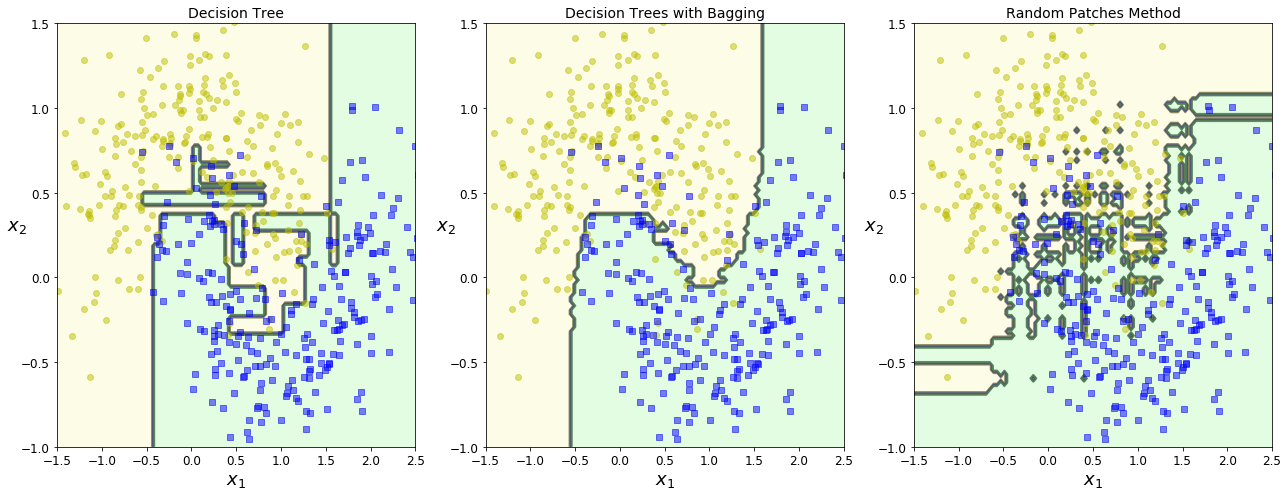

In [41]:
plt.figure(figsize=(18,7))
plt.subplot(131)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(132)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.subplot(133)
plot_decision_boundary(r_p_bag_clf, X, y)
plt.title("Random Patches Method", fontsize=14)
save_fig("decision_tree_without_and_with_bagging_rsm_plot")
plt.show()

## Random Forests: 
- As we discussed, a Random Forest is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with `max_samples` set to the size of the training set. 
- Instead of building a `BaggingClassifier` and passing it a `DecisionTreeClassifier`, you can intead use a `RandomForestClassifier` class which is more convenient and optimised for Decision Trees. ( The `BaggingClassifier` remains useful if you want a bag of something othe than Decision Tree. 
- Similarly, there is a:
## [__`sklearn.ensemble.RandomForestRegressor`__](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)  
- The following code trains a Random Forest classifier with 500 trees (Each limited to maximum of 16 nodes, using all available CPU cores. 


In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(
    n_estimators = 500,
    max_leaf_nodes = 16,
    n_jobs = -1,)

rfc_clf.fit(X_train, y_train)
y_pred_rcf = rfc_clf.predict(X_test)

# Making a Bagging Classifer, which is roughly equivalent
# to the above random forest classifier: 

bag_clf = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(
        max_leaf_nodes= 16,
        splitter = "random",
    presort = False), 
    n_estimators = 500,
    max_samples = 1.0,
    n_jobs = -1, 
    bootstrap = True
)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

# Therefore, their predictions should be identical
np.sum(y_pred_bag == y_pred_rcf)/len(y_pred_bag)

0.99199999999999999

In [43]:
# Therefore, both their accuracy should be equal: 
accuracy_score(y_test, y_pred_rcf)//accuracy_score(y_test, y_pred_bag)

0.0

###### - With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of the `BaggingClassifier` to control the ensemble itself. 
- There are a few exceptions: 
    - `splitter` is absent. It is forced to `random`.  The `splitter` refers to the strategy used to choose the split at each node. Supported strategies include `best` to choose the best split and `random` to choose the best random split. DOUBT: What does it mean by best random split? 
    - `presort` is absent, forced to `False`. This controls whether to presort the data to spped up the finding of the best splits in fitting. This slows down the training process if dealing with very large datasets. On the upside, if dealing with a small dataset (or a restricted depth), this may speed upo the training process. 
    - `max_samples` is absent (forced to 1.0) ,
    - `base_estimator` is absent (forced to `DecisionTreeClassifier`. 
- The `RadnomForest` algorithm introduces extra randomness when growing trees, instead of searching for the very best feature among the features available when splitting a node, it searched for the best feature among a random subset of features. 
- This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. 
DOUBT: Is there low bias cause of more randomness? Why does lower bias estimator lead to a better ensemble? 

## Extra-Trees: 
- When growing a tree in a Random Forest, at eachg node, only a random subset of the feature is considered for splitting (as discussed). 
- It is possible to make trees even more random by using random thresholds for each feature rather than searching for the best possible thresholds (like regular decision tree do). 
- A forest of such extremely random trees is simply called an _Extremely Randomizes Trees_ ensemble (or _Extra - Trees_ for short). 
- Once again, this trades of more bias for a lowere variance. 
- It also makes Extra Trees much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time consuming taks of growing trees. 
- You can create an Extra Trees classifier using Scikit-Learn's `ExtraTreesClassifier`. 
- Its API is identical yo the `RandomForestClassifier` class. 
- Similarly, the `ExtraTreesRegressor` class has the same API as the `RandomForestRegressor` class.   

__TIP__: 
- It is hard to tell in advance whether a `RandomForestClassifier` will perform better or worse than an `ExtraTreesClassifier`. 
- Generally, the only way to know is to try both and compare them using cross validation (and tuning the hyperparameters using grid search). 


## Feature Importance: 
- Yet another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. 
- Scikit-Learn measures a features' importance by looking at how much the tree nodes tht use that feature reduce impurity on average. 
- More precisely, it is aweighted average, where each node's weight is equal to the number of training samples that are associated with it. 
- Scikit-Learn computes this score automatically for each feature after training, then it scaled the result so that the sum of all importances is equalt to 1. 
- You can access the result using the `feature_importance_` variable. 
- For example, the following code trains a `RandomForestClassifier` on the iris dataset and output each feature's importnace. 
- It seems that the most important features are the petal length (44%) and width(42%), while sepal length and width are rather unimportant in comparison (11% and 2%, respectively). 
- DOUBT: How is this different from `GridSearchCV.best_estimator_.feature_importances`: 
    - I don't think there is any different as in Chapter 2, we used grid search on a RandomForestRegressor, found the best estimator, and then use that to find the feature importantces. 

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(
    n_estimators = 500,
    n_jobs = -1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], 
                       rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0949142437733
sepal width (cm) 0.0243690362232
petal length (cm) 0.449467589138
petal width (cm) 0.431249130866


### Running Feature importance on `MNIST`: 

In [45]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")


In [46]:
rnd_clf = RandomForestClassifier(random_state = 42)
rnd_clf.fit(mnist["data"], mnist["target"])
# RandomForestClassifier(bootstrap=True, 
#                        class_weight=None, 
#                        criterion='gini',
#             max_depth=None, max_features='auto',
#                        max_leaf_nodes=None,
#             min_impurity_split=1e-07,
#                        min_samples_leaf=1,
#             min_samples_split=2, 
#                        min_weight_fraction_leaf=0.0,
#             n_estimators=10,
#                        n_jobs=1, 
#                        oob_score=False,
#                        random_state=42,
#             verbose=0, 
#                        warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [47]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
              interpolation = "nearest")
    plt.axis("off")

In [48]:
pd.DataFrame(rnd_clf.feature_importances_.reshape(28,28)).sample()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
6,0.0,0.0,0.000003,0.000008,0.000039,0.000166,0.000439,0.000381,0.00067,0.001158,...,0.001186,0.001598,0.002264,0.000678,0.000929,0.000549,0.000133,0.000069,0.000014,0.0


[<matplotlib.text.Text at 0x111ea8668>, <matplotlib.text.Text at 0x111ee5128>]

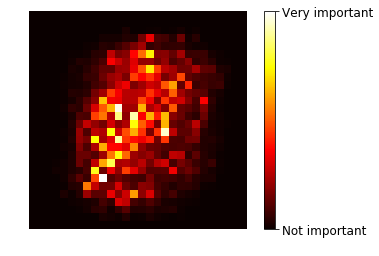

In [49]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks = [rnd_clf.feature_importances_.min(),
                            rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not important", "Very important"])

__Random Forest are very handy to get a quick understanding of what features actually matter, in particular if you need to perform feature selection. __

## Boosting: 
- _Boosting_ (originally called _hypothesis boosting_) refers to any Ensemble method that can combine several weak learners into a strong learner. 
- The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. 
- There are many boosting method avilable, but by far the most popular are _AdaBoost_. (short for _Adaptive Boosting_) and _Gradient Boosting_. 
- Let's start with _Ada Boost_:

## AdaBoost: 
- One way for a new predictor to correct its pedecessor is to pay a bit more attention to the training instances that the predecessor underfitted. DOUBT: Why only underfitted? 
- This results in new predictors focussing more and more on the hard cases. 
- This is the technique used by _AdaBoost_. 
- For example, to build an _AdaBoost_ classifier, at first, a base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. 
- The relative weight of misclassified training instances is then increased. 
- A second classifier is trained using the updated weights and again it makes predictions and the training set weights are updated and so on. 
- DOUBT: If we add weights to training instances, how does that make the classifier focus on them? I can't connect the two points. 

- The following code shows decision boundaries of five consecutive predictors on the moonds dataset (in this example, each predictors is a highly regualrized SVM classifier with an RBF kernel.
    - __NOTE:__ This is just an example. SVMs are generally not good base predictors for AdaBoost, because theyr are slow and tend to be unstabel with _AdaBoost_. DOUBT: Why?? Why is SVM slow / unstable with _AdaBoost_. 
- The first classifier gets many instances wrong, so their weights get _boosted_. 
- The second classifier therefore does a better job on these instances, and so on. 
- The plot on the right represents the same sequence of predictors except that the learning rate is halved. 
- The misclassified instance wights are boosted hald as much at every iteration. 
- As you can see, this sequential learning technique has some similarities with Gradient Descent, except that instead of tweaking a single predictor's performance parameters to minimise a const function, AdaBoost adds predictors to the ensemble, gradually making it better.   

DOUBT: What is the difference between Gradient Descent and AdaBoosting? 

- Once all the predictyors are trained the ensemble makes predictions very much like bagging or pasting, except, the predictios have different weights depending on their overall accuracy on the weighted training set. 
- __WARNING__: There is one important drawback to this sequential learning technique: it cannot be parallelizes (or only partially), since each predictor can only be trained after the previous predictor has been trained and evaluated. 
- As a result, it does not scale as well as bagging or pasting. 
- In bagging or pasting, predictors can be trained and evaluated parallely. But here, we need the result of the first predictor to get to know the instances to which the weight needs to be added.  

Saving figure boosting_plot


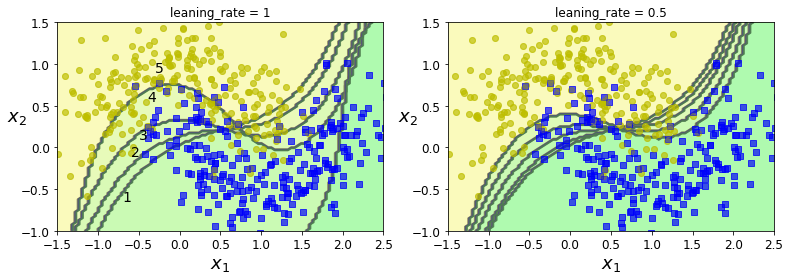

In [56]:
m = len(X_train)

plt.figure(figsize = (11,4))
for subplot, learning_rate in ((121, 1), (122,0.5)):
    sample_weights = np.ones(m)
    for i in range(5):
        plt.subplot(subplot)
        svm_clf = SVC(kernel = "rbf",
                     C = 0.05,
                     random_state = 42)
        
        svm_clf.fit(X_train, y_train, sample_weight = sample_weights)
        # fitting the classifier to the training data and
        # assigning it the sample_weights
        # Per-sample weights. Rescale C per sample.
        # Higher weights force the classifier to put more
        # emphasis on these points.
        
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train]*=(1 + learning_rate)
        # Adding more weights to the misclassified instances
        
        plot_decision_boundary(svm_clf, X, y, alpha = 0.2)
        
        plt.title("leaning_rate = {}".format(learning_rate))

plt.subplot(121)
plt.text(-0.7, -0.65, "1", fontsize=14)
plt.text(-0.6, -0.10, "2", fontsize=14)
plt.text(-0.5,  0.10, "3", fontsize=14)
plt.text(-0.4,  0.55, "4", fontsize=14)
plt.text(-0.3,  0.90, "5", fontsize=14)
save_fig("boosting_plot")
plt.show()

### Closer Look at the _AdaBoost_ Algorithm: 
- Each instance weight $w^i$ is intially set to $\frac{1}{m}$. 
- A first predictor is trained and its weighted error rate $r_1$ is computed on the training set. 
- ### Weighted Error Rate of the $j^{th}$ predictor: 
# $r_j = \frac{{\sum_{i = 1}^m w^i}_{(\hat{y_j^i} \neq y^i)}}{\sum_{i=1}^mw^i}$ 
- where $\hat{y_j^i}$ is the $j^{th}$ predictors predicton for the $i^{th}$ training instance. 
- Weighted Error Rate of the $j^{th}$ predictor is equal to the sum of the weights of misclassified points divided by the total sum of weights. 
- __NOTE:__ $0 \leq r_j \leq 1$ 

- ### The predictor's weight $a_j$ is then computed using the following equation: 
    - # $a_j = \eta log \frac{1 - r_j}{r_j}$
    - As $r_j$ tends to 1 (all points are misclassified), $a_j$, the predictors weight increases. 
    - As $r_j$ tends to 0 (all points classified correctly), $ a_j$, the predictors weight decreases. 
    - Here, $\eta$ is the learning rate hyperparameter (defaults to 1). 
    - The more accuracte the predictor is, the higher it's weight will be. 
        - Less $r_j$, example: 0.1. 
        - $a_j = \eta log{(1-0.1)}{0.1}$
        - $a_j = \eta log(9)$ 
        - $a_j = \eta 0.95 $
    - If it is most oftenly wrong (i.e, less accuracte than random guessing), then its weight will be negative. 
        - More $r_j$, example: 0.9. 
        - $a_j = \eta log{(1-0.9)}{0.9}$
        - $a_j = \eta log(0.11111)$ 
        - $a_j = \eta -0.95$ 
    - If it is just randomly guessing, then its weight will be close to 0. 
        - More $r_j$, example: 0.5. 
        - $a_j = \eta log{(1-0.5)}{0.5}$
        - $a_j = \eta log(1)$ 
        - $a_j = 0$ 

- ### Next, the instance weights are updates using the the following equation: 
    - ## for $i = 1,2, ...., m$
    - ## $ w^i = w^i $ if $\hat{y_j^i} == y^i$ 
    - ## $w^i.e^{a_j}$ if $\hat{y_j^i} \neq y^i$ 
    - ## $ w^i.e^{\eta log \frac{\mathbf{1} - {r_j}}{r_j}}$ if $\hat{y_j^i} \neq y^i$ 
    - ## $ w^i.e^{\eta log \frac{\mathbf{1} - {\frac{{\sum_{i = 1}^m w^i}_{(\hat{y_j^i} \neq y^i)}}{\sum_{i=1}^mw^i}}}{\frac{{\sum_{i = 1}^m w^i}_{(\hat{y_j^i} \neq y^i)}}{\sum_{i=1}^mw^i}}}$ if $\hat{y_j^i} \neq y^i$ 
- Then all the instance weights are normalized (i.e, divided by $\sum_{i=1}^m w^i$ )
- So what we see here happening is that the instances which get misclassified get a higher weight. 
- The instances that get classified correctly, their weight does not change. 
- DOUBT: How does this help us ? How does giving more weight to misclassified instances help us or lead to the learner being careful about them? 
    - Intuitively, the more weight you give to misclassified instances, the more error it will generate if the next hypothesis misclassifies that point again. 
    - This will lead to that hypothesis / predictors getting a high error rate (high $r_j$ ) and consequently a lower predictor weight (low $a_j$). 
    - This will mean that it will contribute less to the final prediction, which makes sense. 
    - You want the predictors that predict well having more influence than the ones that predict badly, cause you'll have to take into account all the predictor's prediction when doing ensemble learning. 

- ### Finally, a new predictor is trained using the updated weights, and the whole process is repeated. 
- The new predictor's weight is computed, the instance weights are updated, then another predictors is trained and so on. 
- The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found. 
- ### To make predictions, the _AdaBoost_ simply computes the predictions of all the predictors and weights them using the predictor weights $a_j$. The predicted class is the one that receives the majority of the weighted votes. 
    - ## $ \hat{y(x)} = argmax_k \sum_{j=1}^N a_j $ where N is the number of predictors 
- DOUBT about Boosting: 
    - How does assigning more weight to the isclassified points help the next learner focus on those points? 
SVC doc: Per-sample weights. Rescale C per sample.Higher weights force the classifier to put more emphasis on these points.
   - How does the AdaBoost make the final prediction in case of classification:
    - i can imagine how it makes the prediction in the case of regression (like a weighted mean) 

- The following code trains an AdaBoost classifier based on 200 _Decision Stumps_. 
- A decision stump is a machine learning model consisting of a one-level decision tree. It is a decision tree with one-internal node (the root) which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediciton based on the value of just a single input feature. This is the default base estimator of the `AdaBoostClassifier`. 
- As you might expect, there is also an `AdaBoostRegressor` claass. 
- 

In [51]:
pd.DataFrame(np.c_[X_train, y_train]).sample()

,0,1,2
130,0.427803,-0.094971,1.0


In [54]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), # simple function
    n_estimators = 200 ,# number of training sets formed / iterations
    algorithm = "SAMME.R", # Stagewise Additive Modeling
                          # using a Multiclass Exponential 
                          # Loss function. 
                          # .R stands for "Real", which relies on
                          # class probabilities rather than predictions
                          # and generally performs better. 
    learning_rate = 0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

__TIP__: If your AdaBoost ensemble is overfitting the training set, you can reduce the number of estimators or more strongly regularize the base estimator. 

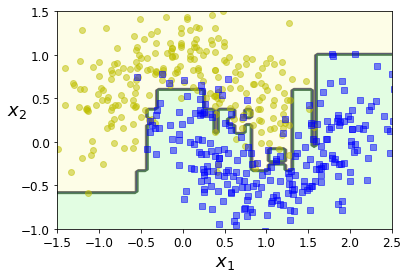

In [55]:
plot_decision_boundary(ada_clf, X, y)

## Gradient Boosting: 
- Another very popular Boosting algorithm is _Gradient Boosting_. 
- Just like _AdaBoost_, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. 
- However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the _residual errors_ made by the previous predictor. 
- Example: _Gradient Tree Boosting_, or _Gradient Boosted Regression Trees (GBRT). 

In [57]:
# Fitting a `DecisionTreeRegressor` to the noisy, 
# quadratic, training set. 
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05 + np.random.randn(100)
pd.DataFrame(np.c_[X,y]).sample(frac = 5/100, random_state = 42)

,0,1
83,-0.436442,1.277998
53,0.394827,0.014190
70,0.272245,-0.964599
45,0.162522,-0.780147
44,-0.241220,1.015593


In [59]:
X.shape, y.shape

((100, 1), (100,))

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2, 
                                 random_state = 42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [62]:
X_new = np.linspace(X[:,0].min(), X[:,0].max(), 100).reshape(-1,1)
y_pred = tree_reg1.predict(X_new)

X_new.shape, y_pred.shape

((100, 1), (100,))

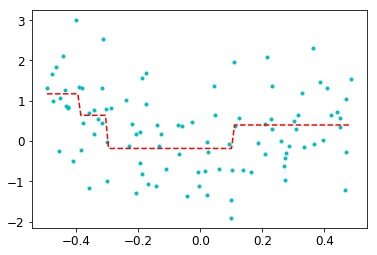

In [64]:
plt.plot(X[:,0],y, "c.")
plt.plot(X_new[:,0], y_pred, "r--")

In [82]:
# Now,train a second `DecisionTreeRegressor` on the residual 
# errors made by the first predictor
y_residuals1 = y - y_pred
y_residuals1.shape

(100,)

In [83]:
tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg2.fit(X,y_residuals1)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

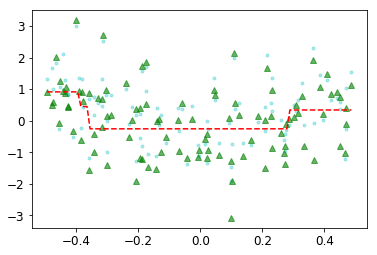

In [97]:
plt.plot(X,y, "c.", alpha = 0.3) # orignal data 
plt.plot(X,y_residuals1, "g^", alpha = 0.6) # residuals1  
y_pred2 = tree_reg2.predict(X_new)
plt.plot(X_new[:,0], y_pred2, "r--")

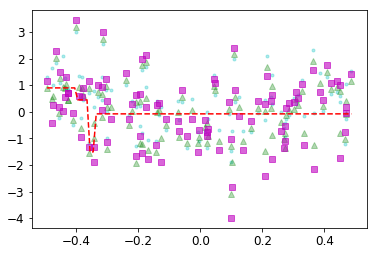

In [98]:
# Now,train a thirds `DecisionTreeRegressor` on the residuals 
# errors made by the second predictor
y_residuals2 = y_residuals1 - y_pred2

tree_reg3 = DecisionTreeRegressor(max_depth = 2, 
                                  random_state = 42)
tree_reg3.fit(X,y_residuals2)
plt.plot(X,y, "c.", alpha = 0.3) # orignal data 
plt.plot(X,y_residuals1, "g^", alpha = 0.3) # residuals 1
plt.plot(X, y_residuals2, "ms", alpha = 0.6) # residuals 2 
y_pred3 = tree_reg3.predict(X_new)
plt.plot(X_new[:,0], y_pred3 , "r--")

- Now, we have an ensemble containing three trees. 
- It can make predictions on a new instance simply by adding up the predictions of all the trees. 

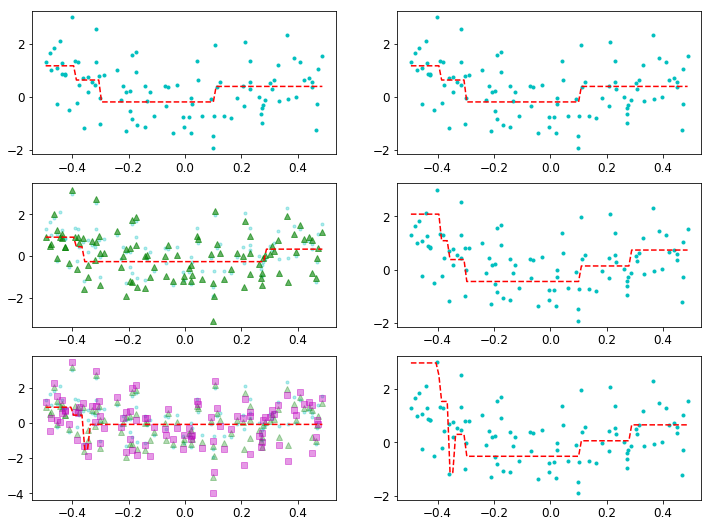

In [107]:
plt.figure(figsize = (12,9))
plt.subplot(321)
plt.plot(X[:,0],y, "c.")
plt.plot(X_new[:,0], y_pred, "r--")

plt.subplot(322)
plt.plot(X[:,0],y, "c.")
plt.plot(X_new[:,0], y_pred, "r--")

plt.subplot(323)
plt.plot(X,y, "c.", alpha = 0.3) # orignal data 
plt.plot(X,y_residuals1, "g^", alpha = 0.6) # residuals1  
y_pred2 = tree_reg2.predict(X_new)
plt.plot(X_new, y_pred2, "r--")

plt.subplot(324)
plt.plot(X[:,0],y, "c.")
y_pred2_1 = tree_reg1.predict(X_new) + tree_reg2.predict(X_new)
plt.plot(X_new, y_pred2_1, "r--")

plt.subplot(325)
plt.plot(X,y, "c.", alpha = 0.3) # orignal data 
plt.plot(X,y_residuals1, "g^", alpha = 0.3) # residuals 1
plt.plot(X, y_residuals2, "ms", alpha = 0.4) # residuals 2 
y_pred3 = tree_reg3.predict(X_new)
plt.plot(X_new[:,0], y_pred3 , "r--")

plt.subplot(326)
plt.plot(X[:,0],y, "c.")
y_pred3_1 = tree_reg1.predict(X_new) + tree_reg2.predict(X_new) + \
tree_reg3.predict(X_new)
plt.plot(X_new[:,0], y_pred3_1 , "r--")

In [108]:
from sklearn.ensemble import GradientBoostingRegressor 

gbrt = GradientBoostingRegressor(max_depth = 2,
                          n_estimators = 3, 
                         learning_rate = 1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

Saving figure gradient_boosting_plot


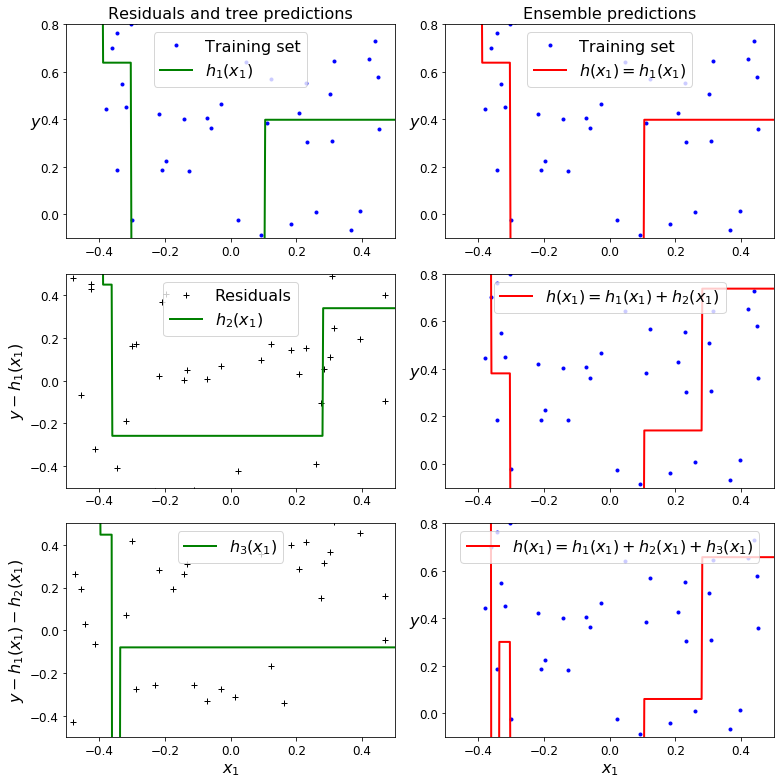

In [110]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y_residuals1, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y_residuals2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

__NOTE:__ The `learning_rate` hyperparameter scaled the contibution of each tree. 
- If you set it to a low value (0.1), you will need more trees in the ensemble to fit the training set, but the predictions will generalise better. 
- This is a regularization rechnique called _shrinkage_. 

- In order to find the optimal number of trees, you can use early stopping. 
- A simple way to implement this is to use the `staged_predict()` method: 
    - It retuns an iterator over the predictions made by the ensemble at each stage of training (with one tree, with tho trees, and so on) .
    - You can train a `GradientBoostingRegressor`, GBRT ensemble with as many tres as you like, then measure the validation error at each stage of training to find the optimal number of trees, and finally traing another GBRT ensemble using the optimal number of trees. 
    

- It is also possible to implement easly stopping by actually stopping training early (insted of training a large number of trees first and then looking back to find the optimal number.) 
- you can do so by setting the `warm_start = True` which makes `Scikit- Learn` keep existing trees when the `fit()` method is called. This allows incremental learning. 

- The `GradientBoostingRegressor` class also supports a `subsample` hyperparameter, which specified the fraction of training instances to be used for training each tree. 
- For example, if `subsample = 0.25`, then each tree is trained on 25% of the the training instances, selected randomly. 
- As you can probably guess by now, this trades in higher bias for lower variance. 
- If also speeds up training considerably. 
- This technique is called _Stochastic Gradient Boosting_. 
- __NOTE:__ It is possible to use Gradient Boosting with other cost function. This is controlled by the `loss` hyperparameter.